Ahora vamos a hacer todo el proceso de TRANSFORMACIÓN y LIMPIEZA de los datos para poder aplicar el modelo de Machine Learning

# LIMPIEZA DF

In [ ]:
import pandas as pd
import numpy as np
import missingno as msgo
import ast
import sys
import os

# Verificar el directorio de trabajo actual
print("Directorio de trabajo actual:", os.getcwd())

# Agregar el directorio 'GammaTech' al sys.path
ruta_funciones = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ruta_funciones not in sys.path:
    sys.path.append(ruta_funciones)

# Ahora intenta importar el módulo
from funciones import *

In [4]:
# Restablecer las opciones de pandas a sus valores predeterminados
pd.reset_option('display.max_colwidth')
pd.reset_option('display.expand_frame_repr')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Configuración para mostrar todo el contenido de las celdas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Especifica la ruta relativa a tu archivo CSV
csv_file_path = r'XXXX'  # Si el archivo está en la misma carpeta que tu script

# Leer el archivo CSV y transformarlo en un DataFrame
df_original = pd.read_csv(csv_file_path)

## Pivotar Tabla

In [6]:
#Elimino la columna que es distinta a las demás y que me puede dar problemas para pivotar
df_original.drop(columns=['moby_score'], inplace=True)

In [7]:
# Pivotar el DataFrame para convertir las variables categóricas de la columna 'platform' en columnas con valores booleanos
df = df_original.pivot_table(index=[col for col in df_original.columns if col != 'platform'],
                                   columns='platform', aggfunc='size', fill_value=0).astype(bool).reset_index()

# Cambiar el nombre de las columnas
df.columns.name = None

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11435 entries, 0 to 11434
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                11435 non-null  int64 
 1   url                               11435 non-null  object
 2   title                             11435 non-null  object
 3   genres                            11435 non-null  object
 4   release_year                      11435 non-null  int64 
 5   Publishers                        11435 non-null  object
 6   Developers                        11435 non-null  object
 7   Review Ranking                    11435 non-null  object
 8   Moby_Score2                       11435 non-null  object
 9   Rating                            11435 non-null  object
 10  Price                             11435 non-null  object
 11  Business Model                    11435 non-null  object
 12  Media Type        

<Axes: >

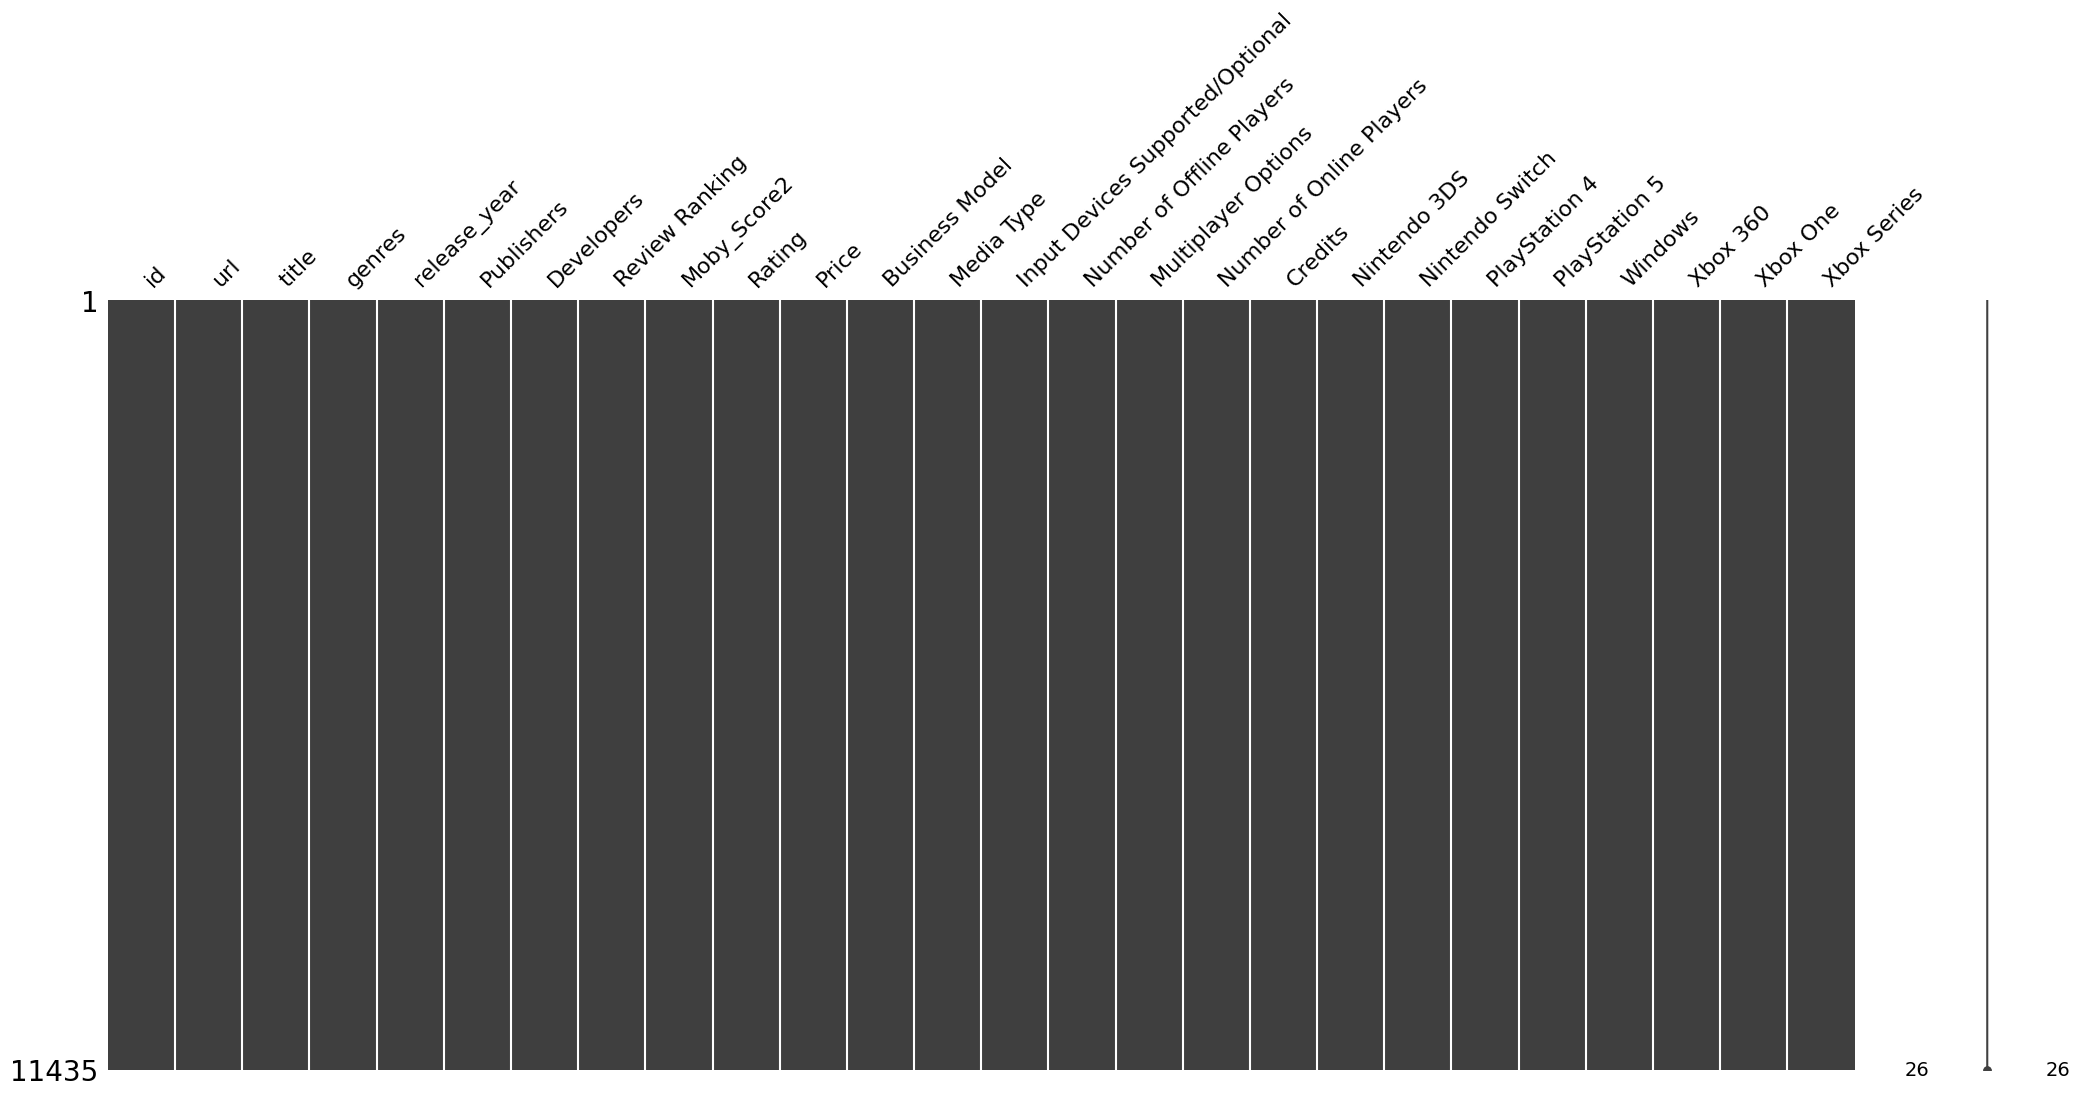

In [9]:
msgo.matrix(df)

In [10]:
df.duplicated().sum()

0

In [11]:
df.head(10)

,id,url,title,genres,release_year,Publishers,Developers,Review Ranking,Moby_Score2,Rating,...,Number of Online Players,Credits,Nintendo 3DS,Nintendo Switch,PlayStation 4,PlayStation 5,Windows,Xbox 360,Xbox One,Xbox Series
0,1,https://www.mobygames.com/game/1/the-x-files-g...,The X-Files Game,"['Adventure', '1st-person', 'Sci-fi / futurist...",1998,"['Fox Interactive, Inc.', 'Sony Computer Enter...",['Hyperbole Studios'],"['#221 on Macintosh', '#651 on PlayStation', '...","['7.1 #12,459 of 24.6K']",['ESRB Rating - Teen'],...,[],"['Executive Producer - Paul Provenzano', 'Prod...",False,False,False,False,True,False,False,False
1,4,https://www.mobygames.com/game/4/sid-meiers-al...,Sid Meier's Alpha Centauri,"['Strategy / tactics', 'Sci-fi / futuristic', ...",1999,"['Electronic Arts, Inc.', 'Tandem Verlag GmbH'...","['Firaxis Games East, Inc.']","['#25 on Macintosh', '#844 on Windows']","['8.0 #2,055 of 24.6K']",['ESRB Rating - Everyone'],...,['7 Players'],"['Lead Design - Brian Reynolds', 'Design - Bin...",False,False,False,False,True,False,False,False
2,6,https://www.mobygames.com/game/6/sid-meiers-ge...,Sid Meier's Gettysburg!,"['Strategy / tactics', 'Historical events', 'R...",1997,"['Electronic Arts, Inc.']","['Firaxis Games East, Inc.']","['#1,131 on Windows']","['7.9 #3,006 of 24.6K']",['ESRB Rating - Kids to Adults'],...,['2-8 Players'],"['Lead Design - Sid Meier', 'Design - Jeffery ...",False,False,False,False,True,False,False,False
3,14,https://www.mobygames.com/game/14/chessmaster-...,Chessmaster 5000,"['Strategy / tactics', 'Chess']",1996,"['Mindscape, Inc.', 'DTP Neue Medien GmbH']","['Mindscape, Inc.']","['#2,111 on Windows']","['7.6 #5,521 of 24.6K']",['ESRB Rating - Kids to Adults'],...,['2 Players'],"['Directed By - Donald W. Laabs', 'Project Man...",False,False,False,False,True,False,False,False
4,16,https://www.mobygames.com/game/16/outrun/,OutRun,"['Racing / Driving', 'Arcade', 'Behind view', ...",2014,"['SEGA Enterprises Ltd.', 'U.S. Gold Ltd.', ''...","['SEGA-AM2 Co., LTD.', 'SEGA Enterprises Ltd.']","['#17 on Nintendo 3DS', '#40 on Arcade', '#43 ...","['7.3 #9,336 of 24.6K']",[],...,[],['Best Outrunners - Yu Suzuki (Yu.) and Satosh...,True,False,False,False,False,False,False,False
5,16,https://www.mobygames.com/game/16/outrun/,OutRun,"['Racing / Driving', 'Arcade', 'Behind view', ...",2018,"['SEGA Enterprises Ltd.', 'U.S. Gold Ltd.', ''...","['SEGA-AM2 Co., LTD.', 'SEGA Enterprises Ltd.']","['#17 on Nintendo 3DS', '#40 on Arcade', '#43 ...","['7.3 #9,336 of 24.6K']",[],...,[],['Best Outrunners - Yu Suzuki (Yu.) and Satosh...,False,True,False,False,False,False,False,False
6,69,https://www.mobygames.com/game/69/simcity-3000/,SimCity 3000,"['Simulation', 'Strategy / tactics', 'Real-tim...",1999,"['Electronic Arts, Inc.', 'Dice Multi Media Eu...",['Maxis Software Inc.'],"['#304 on Macintosh', '#1,103 on Windows']","['7.8 #3,557 of 24.6K']",['ESRB Rating - Everyone'],...,[],"['Development Director - Christine McGavran', ...",False,False,False,False,True,False,False,False
7,99,https://www.mobygames.com/game/99/big-red-racing/,Big Red Racing,"['Action', 'Racing / Driving', '1st-person', '...",1995,"['Domark Software Ltd.', 'Eidos Interactive Li...",['The Big Red Software Company Ltd.'],"['#615 on DOS', '#2,617 on Windows']","['7.3 #9,113 of 24.6K']",['USK Rating - 0 (ohne Altersbeschränkung)'],...,[],"['Lead Programming - R. Fred Williams', 'Progr...",False,False,False,False,True,False,False,False
8,102,https://www.mobygames.com/game/102/robotron-2084/,Robotron: 2084,"['Action', 'Sci-fi / futuristic', 'Arcade', 'T...",2006,"['Williams Electronics, Inc.', 'Atarisoft', ''...",['Vid Kidz'],"['#23 on Arcade', '#26 on Atari 8-bit', '#31 o...","['7.3 #9,891 of 24.6K']",[],...,[],"['Design - Eugene P. Jarvis and Larry DeMar', ...",False,False,False,False,False,True,False,False
9,106,https://www.mobygames.com/game/106/mechwarrior...,MechWarrior 2: 31st Century Combat,"['Action', 'Simulation', '1st-person', 'Sci-fi...",1995,

## Cambiar Nombre Columnas

In [12]:
#Cambiamos nombre columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'release_year': 'year', 'review_ranking': 'ranking'}, inplace=True)

## Transformación Datos y Columnas 

### Eliminar moby_score2

In [13]:
#Primero reemplazo 'n/a' de esa col por NaN y elimino nulos
df['moby_score2'] = df['moby_score2'].replace("['n/a']", np.nan)
df.dropna(subset=['moby_score2'], inplace = True)

In [14]:
# Usar una lambda para limpiar la cadena, extraer el primer número antes del '#' y convertirlo a float
df['score'] = df['moby_score2'].apply(
    lambda x: float(x.strip("[]'").split(' #')[0])
)

In [15]:
df.score.unique()

array([7.1, 8. , 7.9, 7.6, 7.3, 7.8, 8.1, 8.4, 8.2, 7.2, 7.4, 7.5, 6.5,
       6.7, 8.7, 8.5, 8.3, 7. , 6.9, 7.7, 6. , 6.4, 6.8, 5.3, 6.6, 6.3,
       5.7, 4.5, 4.9, 6.2, 5.6, 5.9, 6.1, 5.8, 5.2, 8.6, 5.5, 4.3, 5.4,
       4.2, 4.6, 2.7, 4. , 4.1, 4.8, 4.7, 5.1, 3.8, 5. , 4.4, 3.9, 3.3,
       8.8, 2.2, 8.9, 9. , 3.4, 9.1, 3.6, 3.7, 2.4, 9.2, 9.4, 9.5, 9.3,
       3.2])

In [16]:
df[['moby_score2', 'score']].sample(3)

,moby_score2,score
924,"['6.4 #18,619 of 24.6K']",6.4
2352,"['7.2 #10,415 of 24.6K']",7.2
9749,"['7.4 #8,453 of 24.6K']",7.4


In [17]:
#Tras comprobar que las transformaciones en la nueva columna están bien, podemos dropear moby_score2
df.drop(columns=['moby_score2'], inplace=True)

### Eliminar Créditos

In [18]:
#No voy a usar la col créditos así que la elimino
df.drop(columns=['credits'], inplace=True)

### Eliminar url

In [19]:
df.drop(columns=['url'], inplace=True)

### Rating

In [20]:
# Calcular los value counts
rating_counts = df['rating'].value_counts()

# Cambiar la configuración de pandas para mostrar más filas
#pd.set_option('display.max_rows', len(rating_counts))

rating_counts

rating
[]                                            3834
['ESRB Rating - Teen']                        2047
['ESRB Rating - Everyone']                    1511
['ESRB Rating - Mature']                      1176
['ESRB Rating - Everyone 10+']                 557
                                              ... 
['RARS Rating - 16+']                            1
['ESRB Rating - Kids to Adults, Everyone']       1
['SELL Rating - 12']                             1
['VET/SFB Rating - S/T (Square)']                1
['SMECCV Rating - C (Adultos +18 Años)']         1
Name: count, Length: 73, dtype: int64

In [21]:
rating_mapping = {
    "['ESRB Rating - Teen']": 'T (Teen)',
    "['ESRB Rating - Everyone']": 'E (Everyone)',
    "['ESRB Rating - Kids to Adults']": 'E (Everyone)',
    '[]': 'RP (Rating Pending)',
    "['USK Rating - 0 (ohne Altersbeschränkung)']": 'E (Everyone)',
    "['ESRB Rating - Mature']": 'M (Mature)',
    "['ESRB Rating - Teen, Mature']": 'M (Mature)',
    "['USK Rating - 6']": 'E10+ (Everyone 10+)',
    "['USK Rating - 12']": 'T (Teen)',
    "['USK Rating - 18 (keine Jugendfreigabe)']": 'AO (Adults Only)',
    "['USK Rating - 16']": 'M (Mature)',
    "['PEGI Rating - 3']": 'E (Everyone)',
    "['VRC Rating - GA']": 'E (Everyone)',
    "['ESRB Rating - Kids to Adults, Everyone']": 'E (Everyone)',
    "['ACB Rating - G']": 'E (Everyone)',
    "['ELSPA Rating - 3+']": 'E (Everyone)',
    "['ESRB Rating - Adults Only']": 'AO (Adults Only)',
    "['SELL Rating - TP']": 'E (Everyone)',
    "['PEGI Rating - 12']": 'T (Teen)',
    "['DJCTQ Rating - Livre']": 'E (Everyone)',
    "['ELSPA Rating - 11+']": 'E10+ (Everyone 10+)',
    "['CERO Rating - 15+']": 'T (Teen)',
    "['RSAC Rating - Level 1']": 'E (Everyone)',
    "['RSAC Rating - Level 3']": 'T (Teen)',
    "['ACB Rating - G8+']": 'E10+ (Everyone 10+)',
    "['ESRB Rating - Early Childhood']": 'EC (Early Childhood)',
    "['BBFC Rating - 15']": 'M (Mature)',
    "['SEGA Rating - 推奨年齢\\u3000全年齢 / Suitable for All Ages']": 'E (Everyone)',
    "['ELSPA Rating - 18+']": 'AO (Adults Only)',
    "['PEGI Rating - 7']": 'E10+ (Everyone 10+)',
    "['PEGI Rating - 16']": 'M (Mature)',
    "['ESRB Rating - Everyone 10+']": 'E10+ (Everyone 10+)',
    "['PEGI Rating - 18']": 'AO (Adults Only)',
    "['BBFC Rating - U']": 'E (Everyone)',
    "['RSAC Rating - All']": 'E (Everyone)',
    "['aDeSe Rating - +18']": 'AO (Adults Only)',
    "['Apple Rating - 12+']": 'T (Teen)',
    "['OFLC (New Zealand) Rating - R16']": 'M (Mature)',
    "['TIGRS Rating - Teen Content']": 'T (Teen)',
    "['TIGRS Rating - Family Friendly']": 'E (Everyone)',
    "['Apple Rating - 4+']": 'E (Everyone)',
    "['TIGRS Rating - Adult Content']": 'AO (Adults Only)',
    "['DJCTQ Rating - 18']": 'AO (Adults Only)',
    "['VET/SFB Rating - S/T (Square)']": 'T (Teen)',
    "['SELL Rating - 12']": 'T (Teen)',
    "['Apple Rating - 9+']": 'E10+ (Everyone 10+)',
    "['RARS Rating - 16+']": 'M (Mature)',
    "['Apple Rating - 17+']": 'M (Mature)',
    "['ACB Rating - PG']": 'E10+ (Everyone 10+)',
    "['CERO Rating - A']": 'E (Everyone)',
    "['CERO Rating - C']": 'T (Teen)',
    "['RARS Rating - 18+']": 'AO (Adults Only)',
    "['ACB Rating - M']": 'M (Mature)',
    "['ACB Rating - R18+']": 'AO (Adults Only)',
    "['CERO Rating - B']": 'E10+ (Everyone 10+)',
    "['CERO Rating - D']": 'M (Mature)',
    "['DGRS Rating - Teen']": 'T (Teen)',
    "['GCAM Rating - 12']": 'T (Teen)',
    "['SMECCV Rating - B15 (+15 Años)']": 'T (Teen)',
    "['GCAM Rating - 3']": 'E (Everyone)',
    "['GCAM Rating - 18']": 'AO (Adults Only)',
    "['CERO Rating - Z']": 'AO (Adults Only)',
    "['ClassInd Rating - 12']": 'T (Teen)',
    "['GCAM Rating - 16']": 'M (Mature)',
    "['BBFC Rating - PG']": 'E10+ (Everyone 10+)',
    "['GSRR/TESRI Rating - Restricted (18+)']": 'AO (Adults Only)',
    "['ClassInd Rating - 18']": 'AO (Adults Only)',
    "['VRCR Rating - Moderate']": 'T (Teen)',
    "['VRCR Rating - Comfortable']": 'E (Everyone)',
    "['SMECCV Rating - A (Todo Público)']": 'E (Everyone)',
    "['SMECCV Rating - B (+12 Años)']": 'T (Teen)',
    "['IARC Rating - 7+']": 'E10+ (Everyone 10+)',
    "['SMECCV Rating - C (Adultos +18 Años)']": 'AO (Adults Only)'
}

In [ ]:
for key, value in rating_mapping.items():
    if key in rating_mapping:
        df['rating'].replace(key, value, inplace=True)

In [23]:
# Calcular los value counts
rating_counts = df['rating'].value_counts()

# Cambiar la configuración de pandas para mostrar más filas
#pd.set_option('display.max_rows', len(rating_counts))

rating_counts

rating
RP (Rating Pending)     3834
T (Teen)                2589
E (Everyone)            2317
M (Mature)              1560
E10+ (Everyone 10+)      844
AO (Adults Only)         268
EC (Early Childhood)       8
Name: count, dtype: int64

In [24]:
df.rename(columns={'rating': 'esrb_rating'}, inplace=True)

### publishers & developers

In [25]:
df[['publishers', 'developers']]

,publishers,developers
0,"['Fox Interactive, Inc.', 'Sony Computer Enter...",['Hyperbole Studios']
1,"['Electronic Arts, Inc.', 'Tandem Verlag GmbH'...","['Firaxis Games East, Inc.']"
2,"['Electronic Arts, Inc.']","['Firaxis Games East, Inc.']"
3,"['Mindscape, Inc.', 'DTP Neue Medien GmbH']","['Mindscape, Inc.']"
4,"['SEGA Enterprises Ltd.', 'U.S. Gold Ltd.', ''...","['SEGA-AM2 Co., LTD.', 'SEGA Enterprises Ltd.']"
...,...,...
11430,['Ubisoft Entertainment SA'],['Ubisoft Montpellier SAS']
11431,"['SEGA of America, Inc.']",['Ryu ga Gotoku Studio']
11432,"['Electronic Arts, Inc.']",['EA Vancouver']
11433,"['Electronic Arts, Inc.']",['Codemasters']


In [26]:

# Convertir las cadenas de string en listas
df['publishers'] = df['publishers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 
df['developers'] = df['developers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)



# Eliminar elementos vacíos y espacios en blanco en las listas
df['publishers'] = df['publishers'].apply(lambda lst: [i.strip() for i in lst if i.strip()])
df['developers'] = df['developers'].apply(lambda lst: [i.strip() for i in lst if i.strip()])



# Determinar el número máximo de elementos en las listas de 'publishers' y 'developers'
#max_publishers = df['publishers'].apply(len).max()
#max_developers = df['developers'].apply(len).max()



# Crear columnas separadas para 'publishers'
#for i in range(max_publishers):
    #df[f'publisher{i+1}'] = df['publishers'].apply(lambda x: x[i] if len(x) > i else None)

# Crear columnas separadas para 'developers'
#for i in range(max_developers):
    #df[f'developer{i+1}'] = df['developers'].apply(lambda x: x[i] if len(x) > i else None)



In [27]:
df.sample(2)

,id,title,genres,year,publishers,developers,ranking,esrb_rating,price,business_model,...,number_of_online_players,nintendo_3ds,nintendo_switch,playstation_4,playstation_5,windows,xbox_360,xbox_one,xbox_series,score
4738,42240,LMA Manager 2007,"['Simulation', 'Strategy / tactics', 'Sports',...",2006,"[Codemasters Software Company Limited, The]","[Codemasters Software Company Limited, The]","['#6,127 on Windows']",E (Everyone),[],['Commercial'],...,[],False,False,False,False,True,False,False,False,6.5
3776,30852,Alien Blast: The Encounter,"['Action', '1st-person', 'Sci-fi / futuristic'...",2003,"[Strategy First, Inc., Russobit-M]","[Made By KIDDIES, Inc.]","['#8,115 on Windows']",T (Teen),[],['Commercial'],...,[],False,False,False,False,True,False,False,False,4.8


### price

He detectado que algunos juegos no aparecen en todas las plataformas correspondientes. Vamos a usar la columna Price que tiene precios de todas las plataformas en las que está el juego para arreglar los datos faltantes de las columnas de las plataformas.

In [28]:
#Comprobamos el numero de True/False en la columna de plataformas
windows = df['windows'].value_counts()
playstation4 = df['playstation_4'].value_counts()
xboxone = df['xbox_one'].value_counts()

print(windows, playstation4, xboxone )

windows
True     8187
False    3233
Name: count, dtype: int64 playstation_4
False    10081
True      1339
Name: count, dtype: int64 xbox_one
False    10855
True       565
Name: count, dtype: int64


In [29]:
# Lista de plataformas
platforms = ['nintendo_3ds', 'nintendo_switch', 'playstation_4', 'playstation_5', 'windows', 'xbox_360', 'xbox_one', 'xbox_series']

# Función para normalizar y actualizar las columnas de plataforma basadas en la columna 'price'
def update_platforms(row):
    for platform in platforms:
        # Generar el texto de búsqueda normalizando la plataforma
        search_text = f"buy on {platform.replace('_', ' ').title()}"
        # Si la columna 'price' contiene el texto de búsqueda, actualizar la columna de la plataforma
        if search_text.lower() in row['price'].lower():
            row[platform] = True
    return row

# Aplicar la función a cada fila del DF
df = df.apply(update_platforms, axis=1)

In [30]:
#Comprobación posterior para ver que ha funcionado la función
windows = df['windows'].value_counts()
playstation4 = df['playstation_4'].value_counts()
xboxone = df['xbox_one'].value_counts()

print(windows, playstation4, xboxone )

windows
True     9660
False    1760
Name: count, dtype: int64 playstation_4
False    9708
True     1712
Name: count, dtype: int64 xbox_one
False    10413
True      1007
Name: count, dtype: int64


### Eliminar ranking, price, id

In [31]:
#Eliminamos las columnas que ya no vamos a necesitar para el analisis.
df.drop(columns=['id', 'ranking', 'price'], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11420 entries, 0 to 11434
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             11420 non-null  object 
 1   genres                            11420 non-null  object 
 2   year                              11420 non-null  int64  
 3   publishers                        11420 non-null  object 
 4   developers                        11420 non-null  object 
 5   esrb_rating                       11420 non-null  object 
 6   business_model                    11420 non-null  object 
 7   media_type                        11420 non-null  object 
 8   input_devices_supported/optional  11420 non-null  object 
 9   number_of_offline_players         11420 non-null  object 
 10  multiplayer_options               11420 non-null  object 
 11  number_of_online_players          11420 non-null  object 
 12  nintendo_

### number_of_offline_players 

In [33]:
contar_dato_col(df, 'number_of_offline_players')

number_of_offline_players
<class 'str'>    11420
Name: count, dtype: int64

In [34]:
df['number_of_offline_players']

0           ['1 Player']
1        ['1-7 Players']
2           ['1 Player']
3        ['1-2 Players']
4           ['1 Player']
              ...       
11430       ['1 Player']
11431                 []
11432                 []
11433    ['1-2 Players']
11434       ['1 Player']
Name: number_of_offline_players, Length: 11420, dtype: object

In [35]:
#Vamos a limpiar algunas celdas de esta columna

# Diccionario de sustituciones
sustituciones = {
    "['1 Player, 8+ Players']": "['8+ Players']",
    "['1 Player, 1-8 Players']": "['1-8 Players']",
    "['1 Player, 1-2 Players']": "['1-2 Players']",
    "['1-2 Players, 1-4 Players']": "['1-4 Players']"
}

# Reemplazar valores en la columna
df['number_of_offline_players'] = df['number_of_offline_players'].replace(sustituciones)

In [36]:
#Comprobamos que se haya cambiado bien
df[df['title']=='Quake III: Arena'][['number_of_offline_players']]

,number_of_offline_players
168,['8+ Players']


### number_of_online_players

In [37]:
contar_dato_col(df, 'number_of_online_players')

number_of_online_players
<class 'str'>    11420
Name: count, dtype: int64

In [38]:
df['number_of_online_players']

0                     []
1          ['7 Players']
2        ['2-8 Players']
3          ['2 Players']
4                     []
              ...       
11430                 []
11431                 []
11432                 []
11433                 []
11434                 []
Name: number_of_online_players, Length: 11420, dtype: object

In [39]:
#Vamos a limpiar algunas celdas de esta columna

# Diccionario de sustituciones
sustituciones = {
    "['2 Players, 4 Players']": "['2-4 Players']",
    "['2-4 Players, 4 Players']": "['2-4 Players']",
    "['1 Player, 1-2 Players']": "['1-2 Players']",
    "['2-6 Players, 6 Players']": "['2-6 Players']"
}

# Reemplazar valores en la columna
df['number_of_online_players'] = df['number_of_online_players'].replace(sustituciones)

In [40]:
#Comprobamos que se haya cambiado bien
df[df['title']=='Maelstrom'][['number_of_online_players']]

,number_of_online_players
3639,['2-6 Players']


### CONVERTIR col 'esrb_rating', 'business_model', 'media_type', 'input_devices_supported/optional', 'number_of_offline_players', 'multiplayer_options', 'number_of_online_players'a listas para hacer un multihot encoder en el modelo de ML

In [41]:
#Convertir las strings dentro de estas columnas a listas
columns_to_convert = ['business_model', 'media_type', 'input_devices_supported/optional', 'number_of_offline_players', 'multiplayer_options', 'number_of_online_players']

for column in columns_to_convert:
    df[column] = df[column].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") and x.endswith("]") else x
    )

In [42]:
#Convertir esrb_rating a lista
df['esrb_rating'] = df['esrb_rating'].apply(lambda x: [x] if isinstance(x, str) else x)

In [43]:
import itertools
# Definir una función para aplanar listas y contar valores
def aplanar_contar(column):
    lista_aplanada = list(itertools.chain(*df[column].values))
    return pd.Series(lista_aplanada).value_counts()

# Generar los conteos para cada categoría
conteos = {}
for column in columns_to_convert:
    conteos[column] = aplanar_contar(column)

# Mostrar los conteos
for column, conteo in conteos.items():
    print(f"{column}_conteo:")
    print(conteo)
    print()

business_model_conteo:
Commercial                                 7374
Freeware / Free-to-play / Public Domain     309
Shareware                                   107
Free (initially commercial)                  33
Name: count, dtype: int64

media_type_conteo:
Download                                                 3008
CD-ROM                                                   1889
Download, DVD-ROM                                         974
CD-ROM, Download                                          958
DVD-ROM                                                   724
CD-ROM, Download, DVD-ROM                                 399
Blu-Ray Disc, Download                                    254
CD-ROM, DVD-ROM                                           180
Download, Game Card                                       133
Download, Nintendo 3DS Game Card                           75
Download, PS Vita Card                                     40
Blu-Ray Disc                                             

ELIMINAMOS MEDIA_TYPE

In [44]:
#Tras ver los valores únicos de la columna media type considero que no tiene mucho que aportar al modelo así que la voy a eliminar
df.drop(columns = ['media_type'], inplace=True)

### multiplayer_options

Me he dado cuenta de que esta columna aunque parezca que tiene varios elementos en una lista, en realidad todos se muestran como uno así que vamos a tratarla

In [62]:
# Lambda para separar las strings dentro de la lista por ',' y así obtener una lista de varios elementos
df['multiplayer_options'] = df['multiplayer_options'].apply(lambda x: [item.strip() for sublist in x for item in sublist.split(',')] if isinstance(x, list) else x)

# Verificar el resultado
print("\nContenido actualizado de la columna 'multiplayer_options':")
print(df['multiplayer_options'].head(10))


Contenido actualizado de la columna 'multiplayer_options':
0                                                   []
1    [Hot Seat, Internet, LAN, Modem, Null-modem ca...
2             [Internet, LAN, Modem, Null-modem cable]
3                                                   []
4                                                   []
5                                                   []
6                                                   []
7                 [IPX, LAN, Modem, Same/Split-Screen]
8                                           [Hot Seat]
9              [IPX, Modem, NetBIOS, Null-modem cable]
Name: multiplayer_options, dtype: object


### input_devices_supported/optional

Me he dado cuenta de que esta columna aunque parezca que tiene varios elementos en una lista, en realidad todos se muestran como uno así que vamos a tratarla

In [69]:
# Lambda para separar las strings dentro de la lista por ',' y así obtener una lista de varios elementos
df['input_devices_supported/optional'] = df['input_devices_supported/optional'].apply(lambda x: [item.strip() for sublist in x for item in sublist.split(',')] if isinstance(x, list) else x)

# Verificar el resultado
print("\nContenido actualizado de la columna 'input_devices_supported/optional':")
print(df['input_devices_supported/optional'].head(10))


Contenido actualizado de la columna 'input_devices_supported/optional':
0                                    [Keyboard, Mouse]
1                                           [Keyboard]
2               [Keyboard, Mouse, Other Input Devices]
3                                    [Keyboard, Mouse]
4                      [Pedals, Racing/Steering Wheel]
5                      [Pedals, Racing/Steering Wheel]
6                                           [Keyboard]
7             [Keyboard, Mouse, Racing/Steering Wheel]
8                                                   []
9    [Gravis Gamepad, Keyboard, Mouse, Thrustmaster...
Name: input_devices_supported/optional, dtype: object


### genres

In [45]:
# Vamos a mapear la columna genre para asignar los valores a su categoría correspondiente siguiendo el índice de géneros que tenemos en la web de los videojuegos
categories = {
    "basic_genres": ["Action", "Add-on", "Adventure", "Compilation", "Educational", "Gambling", "Idle", "Puzzle",
                     "Racing / Driving", "Role-playing (RPG)", "Simulation", "Special edition", "Sports", "Strategy / tactics"],
    "perspective": ["1st-person", "3rd-person (Other)", "Audio game", "Behind view", "Diagonal-down", "Side view",
                    "Text-based / Spreadsheet", "Top-down"],
    "visual_presentation": ["2D scrolling", "Cinematic camera", "Fixed / flip-screen", "Free camera", "Isometric"],
    "art_style": ["Anime / Manga", "Augmented reality", "Full Motion Video (FMV)", "Live action", "Video backdrop"],
    "pacing": ["Meditative / Zen", "Persistent", "Real-time", "Turn-based"],
    "gameplay": ["4X", "Action RPG", "Arcade", "Artillery", "Beat 'em up / brawler", "Board game", "Cards / tiles", "Chess",
                 "City building / construction simulation", "Dating simulation", "Falling block puzzle", "Fighting",
                 "Gambling elements", "Game show / trivia / quiz", "Graphic adventure", "Hack and slash", "Hidden object",
                 "Hunting", "Interactive book", "Interactive fiction / text adventure", "Japanese-style RPG (JRPG)",
                 "Japanese-style adventure", "Life / social simulation", "Managerial / business simulation",
                 "Massively Multiplayer", "Mental training", "Metroidvania", "Mini-games", "Music / rhythm", "Paddle / Pong",
                 "Party game", "Pinball", "Platform", "Puzzle elements", "Quick Time Events (QTEs)", "RPG elements",
                 "Rail shooter", "Real-time strategy (RTS)", "Real-time tactics (RTT)", "Roguelike", "Sandbox / open world",
                 "Shooter", "Stealth", "Survival horror", "Tactical RPG", "Tactical shooter", "Tile matching puzzle",
                 "Time management", "Timed input", "Tower defense", "Trading / collectible card", "Tricks / stunts",
                 "Turn-based strategy (TBS)", "Turn-based tactics (TBT)", "Visual novel", "Wargame", "Word construction"],
    "interface/control": ["Direct control", "Menu structures", "Motion control", "Multiple units/characters control",
                          "Point and select", "Text parser", "Voice control"],
    "sports_themes": ["Athletics", "Baseball", "Basketball", "Bowling", "Boxing", "Cricket", "Darts / target shooting",
                      "Dodgeball", "Fishing", "Football (American)", "Football (European) / Soccer", "Golf", "Hockey",
                      "Horse / derby", "Olympiad / mixed sports", "Paintball", "Ping pong / table tennis", "Pool / snooker",
                      "Racquetball / squash", "Rugby", "Sailing / boating", "Skateboarding", "Snowboarding / skiing",
                      "Surfing", "Tennis", "Volleyball", "Wakeboarding", "Wrestling"],
    "educational_categories": ["Ecology / nature", "Foreign language", "Geography", "Graphics / art", "Health / nutrition",
                               "History", "Math / logic", "Music", "Pre-school / toddler", "Reading / writing", "Religion",
                               "Science", "Sociology", "Typing"],
    "vehicular_themes": ["Agricultural / industrial", "Automobile", "Bike / bicycling", "Bus", "Flight / aviation",
                         "Helicopter", "Hovercraft", "Mecha / giant robot", "Motorcycle", "Naval / watercraft", "Off-roading",
                         "Self-propelled artillery", "Snowmobile", "Space flight", "Street racing", "Tank", "Track racing",
                         "Train", "Transport", "Truck", "Vehicle simulator", "Vehicular combat"],
    "setting": ["Africa", "Age of Discovery / Enlightenment", "Asia", "China (Ancient / Imperial)", "Classical antiquity",
                "Cold War", "Contemporary", "Cyberpunk / dark sci-fi", "Egypt (Ancient)", "Europe", "Fantasy",
                "Historical events", "Industrial Age", "Interwar", "Japan (Ancient/Classical/Medieval)",
                "Japan (Modern/Futuristic)", "Medieval", "Middle East", "North America", "Oceania", "Post-apocalyptic",
                "Pre-Columbian Americas", "Prehistoric", "Sci-fi / futuristic", "Sea pirates / Caribbean", "South America",
                "Steampunk", "Western", "World War I", "World War II"],
    "narrative_theme": ["Adult", "Comedy", "Crime", "Detective / mystery", "Healthcare", "Horror", "Martial arts",
                              "Romance", "Spy / espionage", "Survival", "Thriller", "War"],
    "add-on": ["Audio (Music / SFX / Voice)", "Currency", "Customization / outfit / skin", "Edition upgrade", "Extras",
               "Game mode", "Item", "Map / level", "Mechanics", "NPC / enemy", "Other", "Player unit", "Story / mission",
               "Upgrade (Skill / Boost)"],
    "special_edition": ["Digital extras", "Extra content / game", "Physical extras"],
    "other_attributes": ["Fangame", "Licensed", "Regional differences"]
}


In [46]:
#Vamos a convertir la columnas genres a una lista para poder mapearla
df['genres'] = df['genres'].apply(ast.literal_eval)

# Crear nuevas columnas para cada categoría con listas vacías
for category in categories:
    df[category] = [[] for _ in range(len(df))]

# Rellenar las nuevas columnas con las categorías correspondientes
for i, row in df.iterrows():
    for genre in row['genres']:
        for category, values in categories.items():
            if genre in values:
                df.at[i, category].append(genre)

In [47]:
# Generar los conteos para cada categoría
conteos = {}
for category in categories:
    conteos[category] = aplanar_contar(category)

# Mostrar los conteos
for category, conteo in conteos.items():
    print(f"{category}_conteo:")
    print(conteo)
    print()

basic_genres_conteo:
Action                5018
Strategy / tactics    1714
Adventure             1544
Role-playing (RPG)    1381
Simulation            1280
Sports                 799
Racing / Driving       779
Puzzle                 490
Add-on                 455
Compilation            433
Educational            138
Special edition         70
Gambling                18
Idle                     3
Name: count, dtype: int64

perspective_conteo:
1st-person                  3061
3rd-person (Other)          2532
Behind view                 2124
Diagonal-down               2074
Side view                   1582
Top-down                     740
Text-based / Spreadsheet      76
Audio game                     1
Name: count, dtype: int64

visual_presentation_conteo:
2D scrolling           1851
Free camera             585
Isometric               549
Fixed / flip-screen     499
Cinematic camera        191
Name: count, dtype: int64

art_style_conteo:
Anime / Manga              962
Full Motion Video (

### COMPROBAR que las col necesarias sean listas

In [48]:
# Crear un diccionario para almacenar los resultados
type_counts_per_column = {}

# Iterar sobre cada columna del DF
for col in df.columns:
    # Aplicar el conteo de tipos de datos para cada columna y convertir los tipos a cadenas
    type_counts = df[col].apply(lambda x: str(type(x))).value_counts()
    # Almacenar el resultado en el diccionario
    type_counts_per_column[col] = type_counts

# Convertir el diccionario en un DF para visualizar mejor
type_counts_df = pd.DataFrame(type_counts_per_column).fillna(0)

type_counts_df

,title,genres,year,publishers,developers,esrb_rating,business_model,input_devices_supported/optional,number_of_offline_players,multiplayer_options,...,gameplay,interface/control,sports_themes,educational_categories,vehicular_themes,setting,narrative_theme,add-on,special_edition,other_attributes
<class 'bool'>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'float'>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'int'>,0.0,0.0,11420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'list'>,0.0,11420.0,0.0,11420.0,11420.0,11420.0,11420.0,11420.0,11420.0,11420.0,...,11420.0,11420.0,11420.0,11420.0,11420.0,11420.0,11420.0,11420.0,11420.0,11420.0
<class 'str'>,11420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11420 entries, 0 to 11434
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             11420 non-null  object 
 1   genres                            11420 non-null  object 
 2   year                              11420 non-null  int64  
 3   publishers                        11420 non-null  object 
 4   developers                        11420 non-null  object 
 5   esrb_rating                       11420 non-null  object 
 6   business_model                    11420 non-null  object 
 7   input_devices_supported/optional  11420 non-null  object 
 8   number_of_offline_players         11420 non-null  object 
 9   multiplayer_options               11420 non-null  object 
 10  number_of_online_players          11420 non-null  object 
 11  nintendo_3ds                      11420 non-null  bool   
 12  nintendo_

In [50]:
df.sample(5)

,title,genres,year,publishers,developers,esrb_rating,business_model,input_devices_supported/optional,number_of_offline_players,multiplayer_options,...,gameplay,interface/control,sports_themes,educational_categories,vehicular_themes,setting,narrative_theme,add-on,special_edition,other_attributes
10809,Oddballers,"[Action, Comedy, 3rd-person (Other), Diagonal-...",2023,"[Ubisoft Entertainment SA, Ubisoft, Inc., Ubis...","[Game Swing, Ubisoft Entertainment India Pvt. ...",[RP (Rating Pending)],[Commercial],"[Gamepad, Keyboard, Mouse]",[1-4 Players],"[Internet, Same/Split-Screen]",...,[Party game],[Direct control],[],[],[],[],[Comedy],[],[],[]
9128,Kynseed,"[Action, Puzzle elements, Fantasy, Diagonal-do...",2018,[PixelCount Studios Ltd],[PixelCount Studios Ltd],[T (Teen)],[Commercial],"[Gamepad, Keyboard, Mouse]",[1 Player],[],...,"[Puzzle elements, Sandbox / open world]",[Direct control],[],[],[],[Fantasy],[],[],[],[]
9388,Dota: Underlords,"[Strategy / tactics, Fantasy, Turn-based, Diag...",2019,[Valve Corporation],[Valve Corporation],[RP (Rating Pending)],[Freeware / Free-to-play / Public Domain],"[Gamepad, Keyboard, Mouse]",[],[Internet],...,[Turn-based strategy (TBS)],[Point and select],[],[],[],[Fantasy],[],[],[],[]
3784,Hellgate: London,"[1st-person, Sci-fi / futuristic, Shooter, Rol...",2007,"[Electronic Arts, Inc., Namco Bandai Games Ame...","[Flagship Studios, Ping0, LLC]",[M (Mature)],[Commercial],[],[1 Player],"[Internet, LAN, Monthly Subscription]",...,"[Shooter, Hack and slash, Action RPG]",[],[],[],[],"[Sci-fi / futuristic, Post-apocalyptic, Europe]",[],[],[],[]
6821,Wasteland 2,"[Role-playing (RPG), Post-apocalyptic, Turn-ba...",2014,"[inXile Entertainment, Inc., Koch Media GmbH (...","[inXile Entertainment, Inc.]",[M (Mature)],[Commercial],"[Keyboard, Mouse]",[1 Player],[],...,[Tactical RPG],"[Point and select, Multiple units/characters c...",[],[],[],"[Post-apocalyptic, North America]",[],[],[],[]


# MODELO ML

Vamos a hacer un modelo de clasificación para que cuando un usuario busque un videojuego en la base de datos, el modelo busco juegos similares que también podrían gustarle al usuario.

Primero vamos a comprobar si las columnas están formateadas correctamente para pasarle el one-hot encoder o el multi

In [70]:
# Función para verificar si todas las listas en una columna tienen un solo elemento, excluyendo listas vacías
def check_single_element_lists(column):
    if all(isinstance(item, list) for item in column):
        return all(len(item) == 1 for item in column if len(item) > 0)
    return None  # Indicar que no es una lista

# Función para verificar la longitud en cada fila de una columna
def verify_list_lengths(column):
    list_lengths = column.apply(lambda x: len(x) if isinstance(x, list) else None)
    return list_lengths.value_counts()

# Función para mostrar el análisis de una columna
def analyze_column(column_name):
    result = check_single_element_lists(df[column_name])
    if result is not None:
        column_status = 'Un solo elemento' if result else 'Varios elementos'
    else:
        column_status = 'No es una lista'
    
    print(f"\nEstado de la columna '{column_name}': {column_status}")
    
    # Inspección manual de algunas filas de la columna
    print(f"Contenido de la columna '{column_name}':")
    print(df[column_name].head(10))
    
    # Verificar la longitud de las listas en cada fila de la columna
    print(f"Verificación de longitudes en '{column_name}':")
    column_lengths = verify_list_lengths(df[column_name])
    print(column_lengths)
    
    return column_status

# Diccionario para almacenar el resultado del análisis de cada columna
column_analysis = {}

# Analizar todas las columnas del df
for column in df.columns:
    column_status = analyze_column(column)
    column_analysis[column] = column_status

# Convertir el diccionario en un Df para visualizarlo mejor
analysis_df = pd.DataFrame.from_dict(column_analysis, orient='index', columns=['Tipo de Lista'])
print("\nResumen del análisis de todas las columnas:")
print(analysis_df)


Estado de la columna 'title': No es una lista
Contenido de la columna 'title':
0                      The X-Files Game
1            Sid Meier's Alpha Centauri
2               Sid Meier's Gettysburg!
3                      Chessmaster 5000
4                                OutRun
5                                OutRun
6                          SimCity 3000
7                        Big Red Racing
8                        Robotron: 2084
9    MechWarrior 2: 31st Century Combat
Name: title, dtype: object
Verificación de longitudes en 'title':
Series([], Name: count, dtype: int64)

Estado de la columna 'genres': Varios elementos
Contenido de la columna 'genres':
0    [Adventure, 1st-person, Sci-fi / futuristic, D...
1    [Strategy / tactics, Sci-fi / futuristic, Isom...
2    [Strategy / tactics, Historical events, Real-t...
3                          [Strategy / tactics, Chess]
4    [Racing / Driving, Arcade, Behind view, Direct...
5    [Racing / Driving, Arcade, Behind view, Direct...
6  

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


# Volvenos a asegurarnos de que las columnas de listas sean listas 
def eval_lists(column):
    return column.apply(lambda x: eval(x) if isinstance(x, str) else x)

list_columns = ['publishers', 'developers', 'input_devices_supported/optional', 
                'multiplayer_options', 'basic_genres', 'perspective', 'visual_presentation', 
                'art_style', 'pacing', 'gameplay', 'interface/control', 'sports_themes', 
                'educational_categories', 'vehicular_themes', 'setting', 'narrative_theme', 
                'add-on', 'special_edition', 'other_attributes']

for col in list_columns:
    df[col] = eval_lists(df[col])

In [ ]:
# MultiHot Encoding para columnas con listas
#Se utiliza MultiLabelBinarizer para transformar las listas en vectores de codificación one-hot y se almacenan en encoded_features.
mlb = MultiLabelBinarizer()
encoded_features = []

for col in list_columns:
    encoded = pd.DataFrame(mlb.fit_transform(df[col]), columns=mlb.classes_, index=df.index)
    encoded_features.append(encoded)

In [ ]:
# Normalizar columnas numéricas
# Se normalizan las columnas year y score a un rango entre 0 y 1 usando MinMaxScaler.
scaler = MinMaxScaler()
df[['year', 'score']] = scaler.fit_transform(df[['year', 'score']])

In [ ]:
# Combinar todo en un solo df
features = pd.concat(encoded_features + [df[['year', 'score']]], axis=1)

Similitud del coseno -- métrica que mide la similitud entre dos vectores en un espacio multidimensional. En este contexo la similitud del coseno se utiliza para medir qué tan similares son las características de dos juegos.

In [ ]:
# Cálculo de la matriz de similitud del coseno entre todas las filas de features.
cosine_sim = cosine_similarity(features, features)

In [76]:

# Función de recomendación que considera el score y el año
def recomendar_juegos(titulo, cosine_sim=cosine_sim, df=df, weight_score=0.8, weight_year=0.1):
    if titulo not in df['title'].values:
        print("El título proporcionado no se encuentra en el DataFrame.")
        return []
    
    # Verifica si el título proporcionado está en el Ddf
    # Índice del juego dado
    idx = df[df['title'] == titulo].index[0]

    #Calcula la similitud del coseno, la similitud del score y la similitud del año.
    # Similaridad del coseno
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Similaridad del score
    score_sim = 1 - np.abs(df['score'] - df['score'].iloc[idx])
    
    # Similaridad del año
    year_sim = 1 - np.abs(df['year'] - df['year'].iloc[idx])
    
    # Las ponderaciones son coeficientes que se usan para ajustar la importancia relativa de diferentes componentes al combinar métricas de similitud.
    # Combinación de similitudes con ponderaciones (weight year y weight score)
    combined_sim = [(i, (1 - weight_score - weight_year) * sim + weight_score * score_sim.iloc[i] + weight_year * year_sim.iloc[i]) for i, sim in sim_scores]
    combined_sim = sorted(combined_sim, key=lambda x: x[1], reverse=True)
    
    # Top 10 recomendaciones
    combined_sim = combined_sim[1:11]  # Excluye el juego introducido
    juegos_indices = [i[0] for i in combined_sim]
    return df['title'].iloc[juegos_indices]

# Ejemplo
print(recomendar_juegos('Ghost of Tsushima'))


9429                 Bear with Me: The Complete Collection
11188                           The Crew: Wild Run Edition
8908                               Aragami: Shadow Edition
11194            Metal Gear Solid: Master Collection Vol.1
5964                          Devil May Cry: HD Collection
5965                          Devil May Cry: HD Collection
10487                   LEGO Star Wars: The Skywalker Saga
9776                                      Shmup Collection
11122                                   Taito Milestones 2
10280    Prinny Presents NIS Classics Volume 1: Phantom...
Name: title, dtype: object


Si un juego tiene una alta similitud en características (coseno), un score similar y fue lanzado en un año cercano al juego de referencia, su puntuación combinada será alta, haciendo que sea recomendado como uno de los juegos más similares.

In [78]:
features.sample(50)

,1st-person,2D scrolling,3rd-person (Other),4X,Action,Action RPG,Add-on,Adult,Adventure,Africa,...,Story / mission,Upgrade (Skill / Boost),Digital extras,Extra content / game,Physical extras,Fangame,Licensed,Regional differences,year,score
6818,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.655172,0.616438
2632,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.275862,0.630137
4626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.482759,0.657534
2870,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0.344828,0.630137
11190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.965517,0.780822
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.103448,0.726027
9430,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.827586,0.684932
2952,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.379310,0.753425
6637,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.620690,0.780822
10424,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.931034,0.726027


In [82]:
features.describe

<bound method NDFrame.describe of        1st-person  2D scrolling  3rd-person (Other)  4X  Action  Action RPG  \
0               1             0                   0   0       0           0   
1               0             0                   0   1       0           0   
2               0             0                   0   0       0           0   
3               0             0                   0   0       0           0   
4               0             0                   0   0       0           0   
...           ...           ...                 ...  ..     ...         ...   
11430           1             0                   0   0       1           0   
11431           0             0                   0   0       1           0   
11432           0             0                   1   0       0           0   
11433           1             0                   0   0       0           0   
11434           0             0                   0   0       0           0   

       Add-on  Ad